# Project 1 (W5FP)

This is the guided notebook for the Project 1. For this notebook, we will be using the Adult Census Income dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult) (Donated by Ronny Kohavi and Barry Becker
Data Mining and Visualization-Silicon Graphics.) You can download from the link above.

![Visualization](./data_vs.png)

### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database.


## Part 1: Familiarize Yourself With the Dataset

Below is the dataset description from the UCI Machine Learning Repository.

|Name	|Values|
|	----	|-----------|
|	Age		|continuous|
|	Workclass	|               Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked|
|	Fnlwgt	|continuous|
|	Education	|Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool|
|	Education-num|continuous|
|	Marital-status	|Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse|
|	Occupation	|Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
|	Relationship	|Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried|
|	Race	|White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black|
|	Sex	|Female, Male|
|	Capital-gain	|continuous|
|	Capital-loss	|continuous|
|	Hours-per-week	|continuous|
|	Native-country	|United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands|
|	Salary	| <=50K, > 50k|

In [1]:
# Load the adult dataset
import csv
f = open("./adult_data.csv")
records = csv.reader(f, delimiter = ',')

# We define a header ourselves since the dataset contains only the raw numbers.
dataset = []

### Cleaning The DataSet

The Dataset i have used has several fields filled with '?', so i have to remove rows that contain '?' 

![Data Sample](./missing_data_example.jpg)

As we can see the data has random fields of missing data also heading of the data is not provide in dataset. So we have to zip heading and data together in the dateset using **dict(zip(header, line))** function.

In [2]:
# Data cleaning + Conversion of some column to numeric type

# Several lines are comment inside for loop, if you remove the current code and uncomment the 
#code right to it, it will work just fine.

header = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 
          'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Salary']
# 'Fnlwgt' means Final weight

for line in records:
    question_mark = (' ?' in line)
    #question_mark = True
    #for cell in line: #for i in range(len(header)):
        #if cell == ' ?': #if(line[i] == ' ?'):
            #question_mark = False
    if(not(question_mark)):
        d = dict(zip(header, line))
        d['Age'] = int(d['Age'])
        d['Fnlwgt'] = int(d['Fnlwgt'])
        d['Education-num'] = int(d['Education-num'])
        d['Capital-gain'] = int(d['Capital-gain'])
        d['Capital-loss'] = int(d['Capital-loss'])
        d['Hours-per-week'] = int(d['Hours-per-week'])
        dataset.append(d)


In [3]:
len(dataset)

30162

In [122]:
dataset[79]

{'Age': 49,
 'Workclass': ' Local-gov',
 'Fnlwgt': 268234,
 'Education': ' HS-grad',
 'Education-num': 9,
 'Marital-status': ' Married-civ-spouse',
 'Occupation': ' Protective-serv',
 'Relationship': ' Husband',
 'Race': ' White',
 'Sex': ' Male',
 'Capital-gain': 0,
 'Capital-loss': 0,
 'Hours-per-week': 40,
 'Native-country': ' United-States',
 'Salary': ' >50K'}

## Part 2: Simple Statistics

In [4]:
#Average Age Of Adult
ages = [d['Age'] for d in dataset]
avg_age = sum(ages) / len(dataset)
print(avg_age)

38.437901995888865


In [5]:
from collections import defaultdict

In [6]:
# Number of people of a particular age
nPeoplePerAge = defaultdict(int)
for d in dataset:
    nPeoplePerAge[d['Age']] += 1
    
print(nPeoplePerAge)

defaultdict(<class 'int'>, {39: 786, 50: 575, 38: 791, 53: 448, 28: 808, 37: 828, 49: 555, 52: 455, 31: 851, 42: 741, 30: 813, 23: 824, 32: 789, 34: 836, 25: 799, 43: 743, 40: 765, 54: 394, 35: 828, 59: 332, 56: 343, 19: 594, 20: 629, 45: 706, 22: 674, 48: 523, 21: 621, 24: 752, 57: 337, 44: 704, 41: 769, 29: 774, 47: 683, 46: 711, 36: 852, 79: 15, 27: 789, 18: 447, 33: 837, 76: 29, 55: 386, 61: 259, 70: 64, 64: 173, 71: 54, 66: 110, 51: 571, 58: 344, 26: 745, 17: 328, 60: 276, 90: 35, 75: 34, 65: 136, 77: 20, 62: 213, 63: 186, 67: 111, 74: 38, 72: 40, 69: 80, 68: 90, 73: 49, 81: 13, 78: 14, 88: 3, 80: 16, 84: 8, 83: 5, 85: 3, 82: 7, 86: 1})


In [7]:
# Number of people in a particular race
nPeoplePerRace = defaultdict(int)
for d in dataset:
    nPeoplePerRace[d['Race']] += 1
    
print(nPeoplePerRace)

defaultdict(<class 'int'>, {' White': 25933, ' Black': 2817, ' Asian-Pac-Islander': 895, ' Amer-Indian-Eskimo': 286, ' Other': 231})


In [8]:
# Number of people in a particular workclass
nPeoplePerWorkClass = defaultdict(int)
for d in dataset:
    nPeoplePerWorkClass[d['Workclass']] += 1
    
print(nPeoplePerWorkClass)

defaultdict(<class 'int'>, {' State-gov': 1279, ' Self-emp-not-inc': 2499, ' Private': 22286, ' Federal-gov': 943, ' Local-gov': 2067, ' Self-emp-inc': 1074, ' Without-pay': 14})


## Part 3: Data Visualization

In [9]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy
from collections import defaultdict
from matplotlib.ticker import PercentFormatter

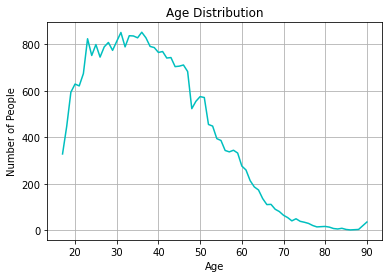

In [118]:
# Age Distribution Of People

age = [d['Age'] for d in dataset]
age.sort()

peoplePerAge = defaultdict(int)
for a in age:
    peoplePerAge[a] += 1
# Visualizing Age In Line Plot
X = list(peoplePerAge.keys())
Y = list(peoplePerAge.values())
#print(X)
#print(Y)

# Customize plot
plt.gca().set(xlabel='Age', ylabel='Number of People',
       title='Age Distribution')
plt.grid()

# Show the plot of Rings vs Number of Abalones
plt.plot(X, Y, color = 'c')

By Visualization we can see that people in age group of approximate 20-50 count the majority of people in dataset

defaultdict(<class 'int'>, {' Adm-clerical': 3721, ' Exec-managerial': 3992, ' Handlers-cleaners': 1350, ' Prof-specialty': 4038, ' Other-service': 3212, ' Sales': 3584, ' Transport-moving': 1572, ' Farming-fishing': 989, ' Machine-op-inspct': 1966, ' Tech-support': 912, ' Craft-repair': 4030, ' Protective-serv': 644, ' Armed-Forces': 9, ' Priv-house-serv': 143})


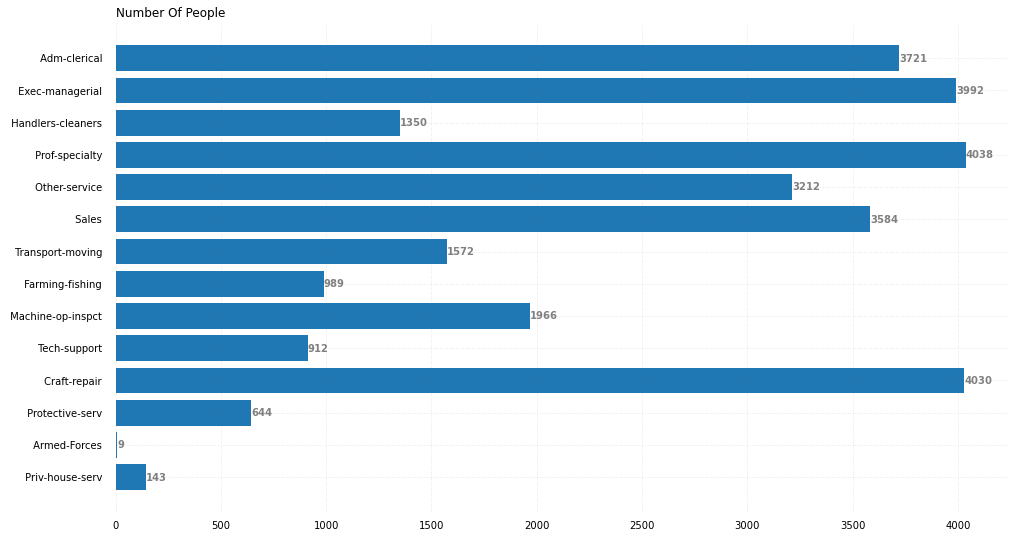

In [55]:
# Bar Plot Showing Total Number Of People With Respective Work Fields

counts_per_job = [d['Occupation'] for d in dataset]

counts_j = defaultdict(int)
for c in counts_per_job:
    counts_j[c] += 1
print(counts_j)

#Plotting

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9)) 

X = list(counts_j.keys())
Y = list(counts_j.values())
# Horizontal Bar Plot 
ax.barh(X, Y)
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

# Show Top Values
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
    
# Add Plot Title
ax.set_title('Number Of People', 
             loc ='left', ) 
  
# Show Plot 
plt.show()

defaultdict(<class 'int'>, {' United-States': 27504, ' Cuba': 92, ' Jamaica': 80, ' India': 100, ' Mexico': 610, ' Puerto-Rico': 109, ' Honduras': 12, ' England': 86, ' Canada': 107, ' Germany': 128, ' Iran': 42, ' Philippines': 188, ' Poland': 56, ' Columbia': 56, ' Cambodia': 18, ' Thailand': 17, ' Ecuador': 27, ' Laos': 17, ' Taiwan': 42, ' Haiti': 42, ' Portugal': 34, ' Dominican-Republic': 67, ' El-Salvador': 100, ' France': 27, ' Guatemala': 63, ' Italy': 68, ' China': 68, ' South': 71, ' Japan': 59, ' Yugoslavia': 16, ' Peru': 30, ' Outlying-US(Guam-USVI-etc)': 14, ' Scotland': 11, ' Trinadad&Tobago': 18, ' Greece': 29, ' Nicaragua': 33, ' Vietnam': 64, ' Hong': 19, ' Ireland': 24, ' Hungary': 13, ' Holand-Netherlands': 1})


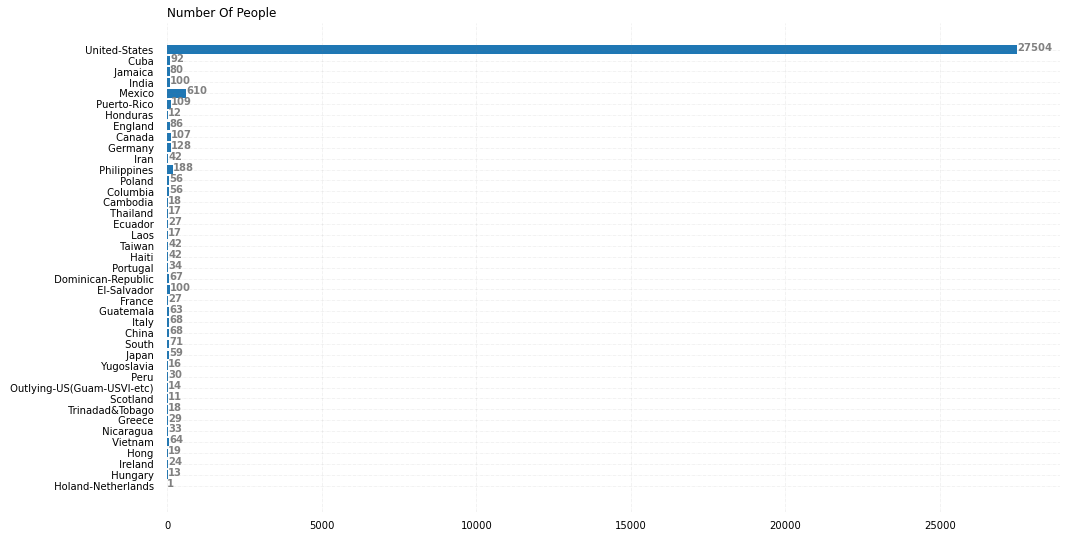

In [58]:
# Bar Plot Showing Total Number Of People Per Country 

counts_per_country = [d['Native-country'] for d in dataset]

counts_c = defaultdict(int)
for c in counts_per_country:
    counts_c[c] += 1
print(counts_c)

#Plotting

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9)) 

X = list(counts_c.keys())
Y = list(counts_c.values())
# Horizontal Bar Plot 
ax.barh(X, Y)
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

# Show Top Values
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
    
# Add Plot Title
ax.set_title('Number Of People', 
             loc ='left', ) 
  
# Show Plot 
plt.show()

 We can see that United-States Counts The Maximum Number Of People

In [60]:
Occupation_population_US = 27504/len(dataset) * 100
print(Occupation_population_US)

91.1875870300378


US Alone have 91% of working popluation

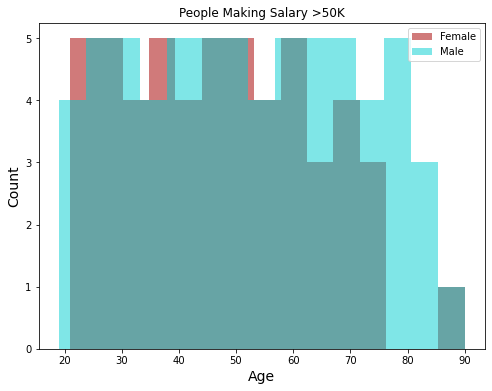

In [98]:
# Male And Female Making Salary Greater Than 50K 

female_count = [d['Age'] for d in dataset if d['Sex'] == ' Female' and d['Salary'] == ' >50K'  ]
female_count.sort()

male_count = [d['Age'] for d in dataset if d['Sex'] == ' Male' and d['Salary'] == ' >50K'  ]
male_count.sort()

f_count = defaultdict(int)
for c in female_count:
    f_count[c] += 1

m_count = defaultdict(int)
for c in male_count:
    m_count[c] += 1

plt.figure(figsize=(8,6))
plt.hist(f_count, bins=15, alpha=0.6, label="Female", color='firebrick')
plt.hist(m_count, bins=15, alpha=0.5, label="Male", color='darkturquoise')

plt.xlabel("Age", size=14)
plt.ylabel("Count", size=14)
plt.title("People Making Salary >50K")
plt.legend(loc='upper right')

We can see that males after age of 63 continue to work and for women this particular graph is falling down. Male making >50K are slightly higher than the females making >50K  

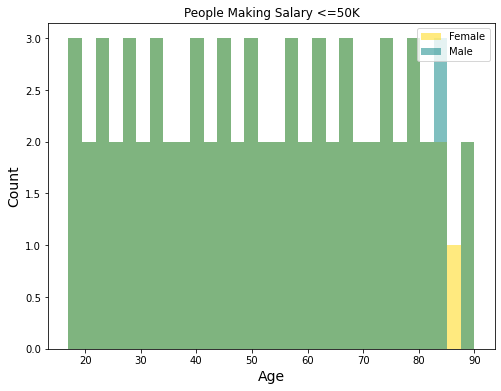

In [124]:
# Male And Female Making Salary Smaller Than Or Equal To 50K 

female_count = [d['Age'] for d in dataset if d['Sex'] == ' Female' and d['Salary'] == ' <=50K'  ]
female_count.sort()

male_count = [d['Age'] for d in dataset if d['Sex'] == ' Male' and d['Salary'] == ' <=50K'  ]
male_count.sort()

f_count = defaultdict(int)
for c in female_count:
    f_count[c] += 1

m_count = defaultdict(int)
for c in male_count:
    m_count[c] += 1

plt.figure(figsize=(8,6))
plt.hist(f_count, bins=30, alpha=0.5, label="Female", color='gold')
plt.hist(m_count, bins=30, alpha=0.5, label="Male", color='teal')

plt.xlabel("Age", size=14)
plt.ylabel("Count", size=14)
plt.title("People Making Salary <=50K")
plt.legend(loc='upper right')

As we can see countings of male and female making <=50 are very much identical.